In [1]:
import torch
import matplotlib.pyplot as plt

# Calllbacks

callbacks as GUI events

In [2]:
import ipywidgets as widgets

In [3]:
def f(o): print('hi')

In [4]:
w = widgets.Button(description='Click me')

In [5]:
w

Button(description='Click me', style=ButtonStyle())

In [6]:
w.on_click(f)

# Creating your own callback

In [7]:
from time import sleep

In [8]:
def slow_calculation():
    '''calculate something and make a second'''
    res = 0
    for i in range(5):
        res += i*i
        sleep(1)
    return res

In [9]:
slow_calculation()

30

In [10]:
def slow_calculation(cb=None):
    '''calculate something and make a second, call a callback'''
    res = 0
    for i in range(5):
        res += i*i
        sleep(1)
        if cb: cb(i)
    return res

In [11]:
def show_progress(epoch):
    print(f"Awesome! We've finished epoch {epoch}!")

In [12]:
slow_calculation(show_progress)

Awesome! We've finished epoch 0!
Awesome! We've finished epoch 1!
Awesome! We've finished epoch 2!
Awesome! We've finished epoch 3!
Awesome! We've finished epoch 4!


30

# Lambdas and partials

In [13]:
slow_calculation(lambda o: print(f"Awesome! We've finished epoch {o}!"))

Awesome! We've finished epoch 0!
Awesome! We've finished epoch 1!
Awesome! We've finished epoch 2!
Awesome! We've finished epoch 3!
Awesome! We've finished epoch 4!


30

In [14]:
def show_progress(exclamation, epoch):
    print(f"{exclamation}! We've finished epoch {epoch}!")

In [15]:
# plug in o with lambda
slow_calculation(lambda o: show_progress("OK I guess", o))

OK I guess! We've finished epoch 0!
OK I guess! We've finished epoch 1!
OK I guess! We've finished epoch 2!
OK I guess! We've finished epoch 3!
OK I guess! We've finished epoch 4!


30

In [16]:
def make_show_progress(exclamation):
    '''no need to input epoch'''
    _inner = lambda epoch: print(f"{exclamation}! We've finished epoch {epoch}!")
    return _inner

In [17]:
slow_calculation(make_show_progress("Nice!"))

Nice!! We've finished epoch 0!
Nice!! We've finished epoch 1!
Nice!! We've finished epoch 2!
Nice!! We've finished epoch 3!
Nice!! We've finished epoch 4!


30

In [18]:
def make_show_progress(exclamation):
    # Leading "_" is generally understood to be "private"
    def _inner(epoch): print(f"{exclamation}! We've finished epoch {epoch}!")
    return _inner

In [19]:
slow_calculation(make_show_progress("Nice!"))

Nice!! We've finished epoch 0!
Nice!! We've finished epoch 1!
Nice!! We've finished epoch 2!
Nice!! We've finished epoch 3!
Nice!! We've finished epoch 4!


30

In [20]:
f2 = make_show_progress("Terrific")

In [21]:
slow_calculation(f2)

Terrific! We've finished epoch 0!
Terrific! We've finished epoch 1!
Terrific! We've finished epoch 2!
Terrific! We've finished epoch 3!
Terrific! We've finished epoch 4!


30

In [22]:
slow_calculation(make_show_progress("Amazing"))

Amazing! We've finished epoch 0!
Amazing! We've finished epoch 1!
Amazing! We've finished epoch 2!
Amazing! We've finished epoch 3!
Amazing! We've finished epoch 4!


30

In [23]:
from functools import partial

In [24]:
slow_calculation(partial(show_progress, "OK I guess"))

OK I guess! We've finished epoch 0!
OK I guess! We've finished epoch 1!
OK I guess! We've finished epoch 2!
OK I guess! We've finished epoch 3!
OK I guess! We've finished epoch 4!


30

In [25]:
f2 = partial(show_progress, "OK I guess")

# Callbacks as callable classes

In [26]:
class ProgressShowingCallback():
    def __init__(self, exclamation="Awesome"):
        self.exclamation = exclamation
    # can put argument into call
    def __call__(self, epoch): print(f"{self.exclamation}! We've finished epoch {epoch}!")


In [27]:
cb = ProgressShowingCallback("Just super")

In [28]:
slow_calculation(cb)

Just super! We've finished epoch 0!
Just super! We've finished epoch 1!
Just super! We've finished epoch 2!
Just super! We've finished epoch 3!
Just super! We've finished epoch 4!


30

# Multiple callback funcs; *args and **kwargs

In [29]:
def f(*args, **kwargs): print(f"args: {args}; kwargs: {kwargs}")

In [30]:
f(3, 'a', thing1="hello")

args: (3, 'a'); kwargs: {'thing1': 'hello'}


In [31]:
def slow_calculation(cb=None):
    res = 0
    for i in range(5):
        if cb: cb.before_calc(i)
        res += i*i
        sleep(1)
        if cb: cb.after_calc(i, val=res)
    return res

In [32]:
class PrintStepCallback():
    def __init__(self): pass
    def before_calc(self, *args, **kwargs):
        print(f"About to start")
    def after_calc(self, *args, **kwargs):
        print(f"Done step")

In [33]:
slow_calculation(PrintStepCallback())

About to start
Done step
About to start
Done step
About to start
Done step
About to start
Done step
About to start
Done step


30

In [34]:
class PrintStatusCallback():
    def __init__(self): pass
    def before_calc(self, epoch, **kwargs): print("About to start: {epoch}")
    def after_calc(self, epoch, val, **kwargs): print(f"After {epoch}: {val}")


In [35]:
slow_calculation(PrintStatusCallback())

About to start: {epoch}
After 0: 0
About to start: {epoch}
After 1: 1
About to start: {epoch}
After 2: 5
About to start: {epoch}
After 3: 14
About to start: {epoch}
After 4: 30


30

# Modifying behavior

In [36]:
def slow_calculation(cb=None):
    res = 0
    for i in range(5):
        if cb and hasattr(cb, 'before_calc'): cb.before_calc(i)
        res += i*i
        sleep(1)
        if cb and hasattr(cb, 'after_calc'):
            if cb.after_calc(i, res): # break if res > 10
                print("stopping early")
                break
    return res

In [37]:
class PrintAfterCallback():
    def after_calc(self, epoch, val):
        print(f"After {epoch}: {val}")
        if val>10: return True

In [38]:
slow_calculation(PrintAfterCallback())

After 0: 0
After 1: 1
After 2: 5
After 3: 14
stopping early


14

In [39]:
class SlowCalculator():
    def __init__(self, cb=None): self.cb, self.res = cb, 0
    
    # def __call__
    def callback(self, cb_name, *args):
        if not self.cb: return
        cb = getattr(self.cb, cb_name, None)
        if cb: return cb(self, *args)
        
    def calc(self):
        # res is an attribute of the class
        for i in range(5):
            # self('before_calc', i) if __call__ is used
            self.callback('before_calc', i)
            self.res += i*i
            sleep(1)
            if self.callback('after_calc', i):
                print("stopping early")
                break

In [40]:
class ModifyingCallback():
    def after_calc(self, calc, epoch):
        print(f"After {epoch}: {calc.res}")
        if calc.res > 10: return True
        # can changes the attribute in the class
        if calc.res < 3: calc.res = calc.res*2

In [41]:
calculator = SlowCalculator(ModifyingCallback())
calculator.calc()

After 0: 0
After 1: 1
After 2: 6
After 3: 15
stopping early


In [42]:
calculator.res

15

## ```__dunder__```

In [43]:
class SloppyAdder():
    def __init__(self, o): self.o=o
    def __add__(self, b): return SloppyAdder(self.o + b.o + 0.01)
    def __repr__(self): return str(self.o)

In [44]:
a = SloppyAdder(1)
b = SloppyAdder(2)
a+b

3.01

# Variance 

In [46]:
t = torch.tensor([1., 2., 4., 18])
m = t.mean(); m

tensor(6.2500)

In [47]:
(t-m).mean()

tensor(0.)

In [48]:
(t-m).pow(2).mean()

tensor(47.1875)

In [49]:
(t-m).abs().mean()

tensor(5.8750)

In [50]:
(t-m).pow(2).mean().sqrt()

tensor(6.8693)

In [51]:
(t-m).pow(2).mean(), (t*t).mean() - (m*m)

(tensor(47.1875), tensor(47.1875))

# Covariance and correlation

In [52]:
t

tensor([ 1.,  2.,  4., 18.])

In [53]:
u = t * 2
u *= torch.randn_like(t)/10 + 0.95

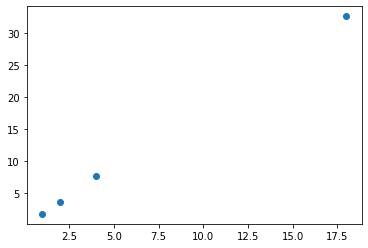

In [54]:
plt.scatter(t, u)

In [55]:
prod = (t-t.mean())*(u*u.mean())
prod

tensor([-101.3147, -170.2563, -193.8590, 4344.4307])

In [56]:
prod.mean()

tensor(969.7501)

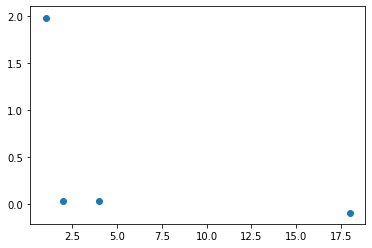

In [60]:
v = torch.randn_like(t)
plt.scatter(t, v)

In [62]:
((t-t.mean())*(v-v.mean())).mean()

tensor(-2.9232)

In [63]:
cov = (t*v).mean() - t.mean()*v.mean();
cov

tensor(-2.9232)

Pearson correlation coefficient

In [64]:
cov / (t.std() * v.std())

tensor(-0.3701)

# Softmax

In [65]:
def log_softmax(x): return x - x.exp().sum(-1, keepdim=True).log()

which is:

$$\hbox{logsoftmax(x)}_{i} = x_{i} - \log \sum_{j} e^{x_{j}}$$

And our cross entropy loss is:

-log(pi)
